# DESARRO DE LA PRACTICA - SOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# definicion de las condiciones iniciales

def fa(x):
  return np.cos(2*x)

def fb(x):
  return np.cos(2*x) + np.sin(2)

def fc(y):
  return np.sin(2*y)+1

def fd(y):
  return np.sin(2*y)+np.cos(2)

a,b = 0,1
c,d = 0,1

nx, ny = 5,10

maxiter = 5000
tol = 1e-6

In [ ]:
# funtion SOR

def SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, maxiter, tol, w):
    x = np.linspace(a, b, nx+1)
    y = np.linspace(c, d, ny+1)
    h = (b-a)/nx
    k = (d-c)/ny
    U = np.zeros((ny+1, nx+1))

    lamda = k/h

    U[0, :] = fa(x)
    U[-1,:] = fb(x)
    U[:, 0] = fc(y)
    U[:, -1] = fd(y)

    iter = 1
    error = tol +1
    V = np.copy(U)

    while iter < maxiter and error > tol:
      for j in range(1, ny):
        for i in range(1, nx):
          V[j, i] = (1/(-4*k**2 +2+2*lamda**2))*(lamda**2 *(U[j,i+1]+ V[j,i-1])+ (U[j+1,i]+V[j-1,i]))
          V[j, i] = (1 - w)*U[j, i] + w*V[j, i]
      error = np.max(np.abs(U-V))
      U = np.copy(V)
      iter += 1

    return x, y, U, iter, error


In [ ]:
w_values = []
iters_values = []
for w in np.arange(0, 2.1, 0.1):
    x, y, U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, maxiter, tol, w)
    w_values.append(w)
    iters_values.append(iters)
    print(f"w = {w:.1f} \t iters = {iters} \t error = {error:.2e}")


w = 0.0 	 iters = 2 	 error = 0.00e+00
w = 0.1 	 iters = 1437 	 error = 9.98e-07
w = 0.2 	 iters = 736 	 error = 9.91e-07
w = 0.3 	 iters = 485 	 error = 9.90e-07
w = 0.4 	 iters = 354 	 error = 9.85e-07
w = 0.5 	 iters = 273 	 error = 9.69e-07
w = 0.6 	 iters = 217 	 error = 9.73e-07
w = 0.7 	 iters = 176 	 error = 9.77e-07
w = 0.8 	 iters = 145 	 error = 9.40e-07
w = 0.9 	 iters = 120 	 error = 9.25e-07
w = 1.0 	 iters = 99 	 error = 9.71e-07
w = 1.1 	 iters = 82 	 error = 9.21e-07
w = 1.2 	 iters = 67 	 error = 9.01e-07
w = 1.3 	 iters = 54 	 error = 7.73e-07
w = 1.4 	 iters = 41 	 error = 7.47e-07
w = 1.5 	 iters = 27 	 error = 5.16e-07
w = 1.6 	 iters = 34 	 error = 5.42e-07
w = 1.7 	 iters = 45 	 error = 6.22e-07
w = 1.8 	 iters = 69 	 error = 8.07e-07
w = 1.9 	 iters = 140 	 error = 8.49e-07
w = 2.0 	 iters = 5000 	 error = 1.91e+00


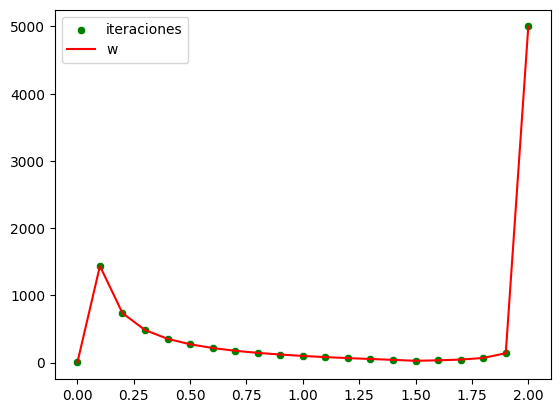

In [ ]:
sns.scatterplot(x=w_values, y=iters_values, color = 'green', label = 'iteraciones')
plt.plot(w_values, iters_values, color = 'red', label = 'w')
plt.legend()
plt.show()



In [ ]:
# SOR con w=1.5
w = 1.5
x, y, U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, maxiter, tol, w)
print(U)

[[ 1.          0.92106099  0.69670671  0.36235775 -0.02919952 -0.41614684]
 [ 1.19866933  1.12084176  0.89669195  0.56203587  0.16993539 -0.21747751]
 [ 1.38941834  1.31236912  1.08843586  0.7535936   0.36110096 -0.02672849]
 [ 1.56464247  1.48812255  1.26436955  0.92942018  0.53665668  0.14849564]
 [ 1.71735609  1.64115928  1.41752758  1.08252344  0.68959547  0.30120925]
 [ 1.84147098  1.76540833  1.54182754  1.20680664  0.81381499  0.42532415]
 [ 1.93203909  1.85592048  1.63231438  1.29731026  0.90435673  0.51589225]
 [ 1.98544973  1.90906775  1.68535822  1.35040887  0.957602    0.56930289]
 [ 1.9995736   1.92268415  1.69879767  1.36395551  0.97141621  0.58342677]
 [ 1.97384763  1.89614249  1.67202418  1.33736822  0.94523633  0.55770079]
 [ 1.90929743  1.83035842  1.60600414  1.27165518  0.8800979   0.49315059]]


In [ ]:
print(f"Iteraciones = {iters} \nError = {error}")

Iteraciones = 27 
Error = 5.158941498439873e-07


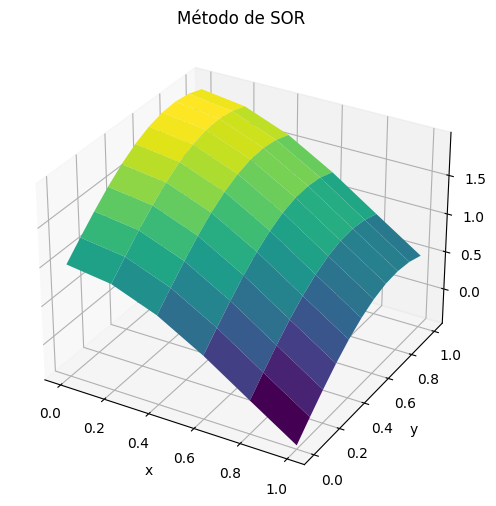

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection = '3d')
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,U, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
ax.set_title('Método de SOR')

plt.show()

## Comprobando con la solución real

$$U(x,y) = sin(2y) + cos(2x)$$

In [ ]:
x = np.linspace(a,b, nx+1)
y = np.linspace(c,d, ny+1)

def F(x,y):
  return np.sin(2*y)+np.cos(2*x)

X,Y = np.meshgrid(x,y)
Z = F(X,Y)
print("---- Tabla de valores de la solución real")
print(Z)

---- Tabla de valores de la solución real
[[ 1.          0.92106099  0.69670671  0.36235775 -0.02919952 -0.41614684]
 [ 1.19866933  1.11973032  0.89537604  0.56102709  0.16946981 -0.21747751]
 [ 1.38941834  1.31047934  1.08612505  0.7517761   0.36021882 -0.02672849]
 [ 1.56464247  1.48570347  1.26134918  0.92700023  0.53544295  0.14849564]
 [ 1.71735609  1.63841708  1.4140628   1.07971385  0.68815657  0.30120925]
 [ 1.84147098  1.76253198  1.53817769  1.20382874  0.81227146  0.42532415]
 [ 1.93203909  1.85310008  1.6287458   1.29439684  0.90283956  0.51589225]
 [ 1.98544973  1.90651072  1.68215644  1.34780748  0.95625021  0.56930289]
 [ 1.9995736   1.9206346   1.69628031  1.36193136  0.97037408  0.58342677]
 [ 1.97384763  1.89490862  1.67055434  1.33620539  0.94464811  0.55770079]
 [ 1.90929743  1.83035842  1.60600414  1.27165518  0.8800979   0.49315059]]


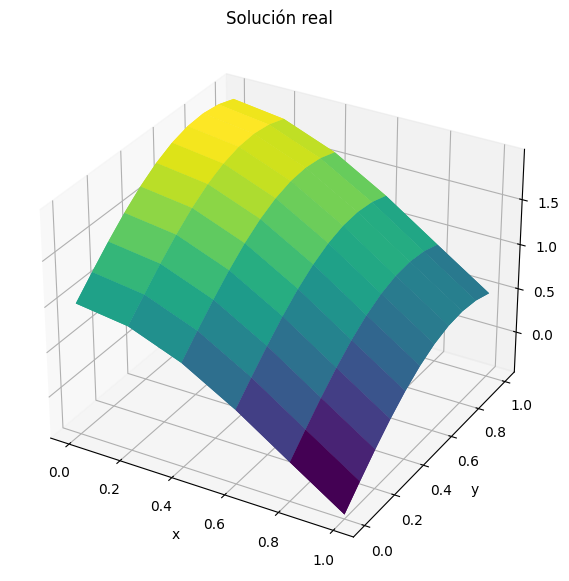

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
ax.set_title('Solución real')

plt.show()

In [ ]:
# diferencia de matrices between la real (X) y aproximada (U)
diferencia = np.abs(U-Z)
print(diferencia)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.00111144 0.00131591 0.00100878 0.00046558 0.        ]
 [0.         0.00188978 0.0023108  0.00181751 0.00088214 0.        ]
 [0.         0.00241908 0.00302037 0.00241996 0.00121372 0.        ]
 [0.         0.0027422  0.00346478 0.00280959 0.0014389  0.        ]
 [0.         0.00287635 0.00364984 0.0029779  0.00154353 0.        ]
 [0.         0.0028204  0.00356858 0.00291342 0.00151717 0.        ]
 [0.         0.00255702 0.00320178 0.00260139 0.00135179 0.        ]
 [0.         0.00204956 0.00251735 0.00202415 0.00104213 0.        ]
 [0.         0.00123386 0.00146984 0.00116283 0.00058822 0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
